In this weeks assignment you will gain practical experience in working with both data and statistical models, the most important skillset you should retain from this course. You can solve the assignment in your programming language of choice, but should hand in the solution as a runnable file (e.g. an R-script, a Python-script, a Quarto-file, a Jupyter notebook etc). Ensure that your file can be run from top to bottom without any modifications, which is not necessarily the case if you tend to run the script line-by-line and jump back and forth while programming. If you are unable to solve any of the tasks contact me by email and I can help out. If you are unable to do so before the deadline, reflect and write a brief summary on why you think you are seeing the problems you are seeing.

### Exercise 1: Preparations
1. Download the Auto.csv dataset from the ISLP website (https://www.statlearning.com/resources-pythonLinks to an external site. or https://www.statlearning.com/resources-second-edition). This you can do outside Python or R, but from here on out the remainder of the solution should be programmed.
2. Read the Auto.csv-dataset into memory.
3. In the horsepower-column, some values are missing. These are encoded with ‘?’. Remove these rows from the dataset.
4. Create a new column ‘muscle’. This column should contain a 1 for all muscle cars (e.g. cars that have above average horsepower) and 0 for the rest. (HINT: To help you out I have calculated that the mean horsepower is 104.46. After creating the column you should end up with approximately 148 muscle cars and 244 others (assuming that you have already removed the rows with horsepower=’?’ above)).

In [14]:
import numpy as np
import pandas as pd

from collections import Counter

df = pd.read_csv('https://www.statlearning.com/s/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)
df['muscle'] = df['horsepower'].apply(lambda x: 0 if x < df['horsepower'].mean() else 1)
print(f'Muscle counts: {Counter(df["muscle"])}')


Muscle counts: Counter({0: 244, 1: 148})


5. Split the dataset into a training set and a test set, by randomly drawing 80% of the rows for the former and 20% of the rows for the latter. We will get into why this is a good idea in later lectures, but its good practice to start with evaluating the models in held-out data from the get go.

In [15]:
np.random.seed(42)
df = df.sample(frac=1.)
train_length = int(0.8 * len(df))
train = df[:train_length]
test = df[train_length:]
print(f'Train samples: {len(train)}')
print(f'Test samples: {len(test)}')

Train samples: 313
Test samples: 79


### Exercise 2: Simple linear regression
1. Fit a simple linear regression model using horsepower as the predictor and mpg as the outcome using the training data. 
2. Create a scatter plot with horsepower on the x-axis and mpg on the y-axis using the testing data. Plot the regression line found by the model in the plot (Hint: To achieve this you need to find the intercept and the single coefficient of the model, generate predictions or use built-in plotting functionality).

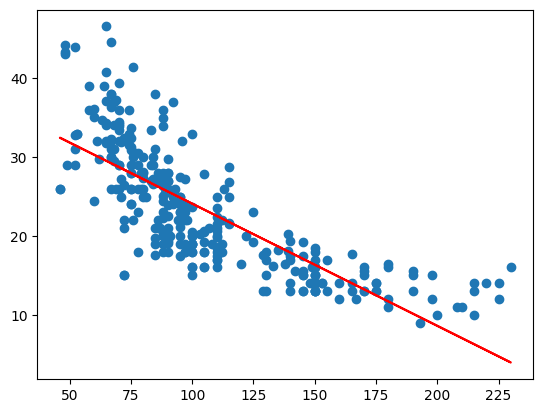

In [19]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train[['horsepower']], train['mpg'])
plt.scatter(train['horsepower'], train['mpg'])
plt.plot(train['horsepower'], model.predict(train[['horsepower']]), c='red')
plt.show()

3. Use the model to generate predictions for the training set. Calculate and report the mean absolute error (MAE) of these predictions.

In [21]:
from sklearn.metrics import mean_absolute_error

train_predictions = model.predict(train[['horsepower']])
train_mae = mean_absolute_error(train['mpg'], train_predictions)
print(f'Train MAE: {train_mae:.2f}')

Train MAE: 3.80


4. Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.

In [22]:
test_predictions = model.predict(test[['horsepower']])
test_mae = mean_absolute_error(test['mpg'], test_predictions)
print(f'Test MAE: {test_mae:.2f}')

Test MAE: 3.98


5. Reflection: Is the training or testing MAE is lower? Does this match your expectation? What would be the general pattern we expect here (e.g. one is lower than the other, they are the same, ...), and why do we expect that?

The training error is lower than the test error, as we would expect. We expect this because the training data is what the model has used to find the patterns it applied to make its predictions, and we also assume it has to some degree fitted to the noise here (which is never the case in the training set)

### Exercise 3: Multivariate linear regression
1. Fit a multivariate linear regression model using horsepower, weight, displacement, and year as predictors and mpg as the outcome.
2. Print the intercept and coefficients of the model (these should be identifiable such that I’m able to deduce which coefficient belongs to which variable). What can you say about the relationship between mpg and the year-variable based on these?

In [27]:
predictors = ['horsepower', 'weight', 'displacement', 'year']

model = LinearRegression()
model.fit(train[predictors], train['mpg'])

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {list(zip(predictors, np.round(model.coef_, 5)))}')

# The miles per gallon increases as a function of the year the car was built

Intercept: -15.469472121716091
Coefficients: [('horsepower', -0.00486), ('weight', -0.00656), ('displacement', 0.00226), ('year', 0.76951)]


3. Use the model to generate predictions for the training set. Calculate and report the MAE of these predictions.

In [28]:
train_predictions = model.predict(train[predictors])
train_mae = mean_absolute_error(train['mpg'], train_predictions)
print(f'Train MAE: {train_mae:.2f}')

Train MAE: 2.65


4. Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.

In [29]:
test_predictions = model.predict(test[predictors])
test_mae = mean_absolute_error(test['mpg'], test_predictions)
print(f'Test MAE: {test_mae:.2f}')

Test MAE: 2.47


5. Reflection: Is the training MAE lower or higher than in the simple linear regression model? Does it have to be this way, or could it have been otherwise? What about the testing MAE?

The training MAE is lower in the multivariate model, as we would expect. A model always improves its training error when adding more predictors. The testing MAE is also lower in the multivariate model, which does not have to be the case. Specifically, if we add predictors that are not related to the outcome in the data generating function, this would typically yield a worse model when tested out-of-sample

### Exercise 4: Logistic regression
1. Fit a logistic regression model using weight, displacement and year as predictors and our newly created muscle-column as the outcome. Why don’t we use horsepower as a predictor in this model?
2. Use the model to generate predictions for the training set. Calculate and report the accuracy of these predictions.
3. Use the model to generate predictions for the testing set. Calculate and report the accuracy of these predictions.

In [ ]:
from sklearn.linear_model import LogisticRegression

predictors = ['weight', 'displacement', 'year']
# We don't use the horsepower-column here as it directly predicts the muscle column

model = LogisticRegression()
model.fit(train[predictors], train['muscle'])

for dataset, name in [(train, 'Train'), (test, 'Test')]:
    predictions = model.predict(dataset[predictors])
    accuracy = accuracy